In [1]:
!pip install yfinance



In [2]:
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf


plt.style.use('fivethirtyeight')

In [3]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2022-07-30 at 16:41:44


In [4]:
start = datetime.datetime(2012, 11, 4) # START ON January 1 2016
end = datetime.datetime(2022,7,27)
# end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['TSLA','AAPL']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
TSLA_AAPL_stocks = pd.concat(df_map,axis = 1,keys = tickers)
TSLA_AAPL_stocks.head()

TSLA                                                AAPL  \
             Open   High    Low  Close Adj Close    Volume       Open   
Date                                                                    
2012-11-05  5.960  6.316  5.866  6.300     6.300  10244500  20.840000   
2012-11-06  6.122  6.240  5.990  6.230     6.230  11620000  21.079643   
2012-11-07  6.200  6.410  6.162  6.308     6.308   8572500  20.494286   
2012-11-08  6.202  6.376  6.188  6.262     6.262   6370000  20.022499   
2012-11-09  6.120  6.186  5.970  6.064     6.064   4315000  19.300714   

                                                                    
                 High        Low      Close  Adj Close      Volume  
Date                                                                
2012-11-05  20.991785  20.628571  20.879286  17.928812   529135600  
2012-11-06  21.097857  20.717501  20.816071  17.874525   374917200  
2012-11-07  20.519285  19.848213  19.928572  17.190603   793648800  
2012-11-08  20.079643  19.117500  19.205357  16.566755  1056146000  
2012-11-09  19.817142  19.061428  19.537857  16.853569   929913600

In [6]:
df = pd.DataFrame(TSLA_AAPL_stocks) #KO_PEP_stocks dataframe
for tick in tickers:
    df[tick+'_Return'] = TSLA_AAPL_stocks[tick]['Close'].pct_change()
df.head()

TSLA                                                AAPL  \
             Open   High    Low  Close Adj Close    Volume       Open   
Date                                                                    
2012-11-05  5.960  6.316  5.866  6.300     6.300  10244500  20.840000   
2012-11-06  6.122  6.240  5.990  6.230     6.230  11620000  21.079643   
2012-11-07  6.200  6.410  6.162  6.308     6.308   8572500  20.494286   
2012-11-08  6.202  6.376  6.188  6.262     6.262   6370000  20.022499   
2012-11-09  6.120  6.186  5.970  6.064     6.064   4315000  19.300714   

                                                                    \
                 High        Low      Close  Adj Close      Volume   
Date                                                                 
2012-11-05  20.991785  20.628571  20.879286  17.928812   529135600   
2012-11-06  21.097857  20.717501  20.816071  17.874525   374917200   
2012-11-07  20.519285  19.848213  19.928572  17.190603   793648800   
2012-11-08  20.079643  19.117500  19.205357  16.566755  1056146000   
2012-11-09  19.817142  19.061428  19.537857  16.853569   929913600   

           TSLA_Return AAPL_Return  
                                    
Date                                
2012-11-05         NaN         NaN  
2012-11-06   -0.011111   -0.003028  
2012-11-07    0.012520   -0.042635  
2012-11-08   -0.007292   -0.036290  
2012-11-09   -0.031619    0.017313

In [7]:
df.columns = ['TSLA_Open','TSLA_High','TSLA_Low','TSLA_Close','TSLA_AdjClose','TSLA_Volume',
                  'AAPL_Open','AAPL_High','AAPL_Low','AAPL_Close','AAPL_AdjClose','AAPL_Volume', 'TSLA_Return', 'AAPL_Return']

df.head()

,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_AdjClose,TSLA_Volume,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_AdjClose,AAPL_Volume,TSLA_Return,AAPL_Return
Date,,,,,,,,,,,,,,
2012-11-05,5.960,6.316,5.866,6.300,6.300,10244500,20.840000,20.991785,20.628571,20.879286,17.928812,529135600,NaN,NaN
2012-11-06,6.122,6.240,5.990,6.230,6.230,11620000,21.079643,21.097857,20.717501,20.816071,17.874525,374917200,-0.011111,-0.003028
2012-11-07,6.200,6.410,6.162,6.308,6.308,8572500,20.494286,20.519285,19.848213,19.928572,17.190603,793648800,0.012520,-0.042635
2012-11-08,6.202,6.376,6.188,6.262,6.262,6370000,20.022499,20.079643,19.117500,19.205357,16.566755,1056146000,-0.007292,-0.036290
2012-11-09,6.120,6.186,5.970,6.064,6.064,4315000,19.300714,19.817142,19.061428,19.537857,16.853569,929913600,-0.031619,0.017313


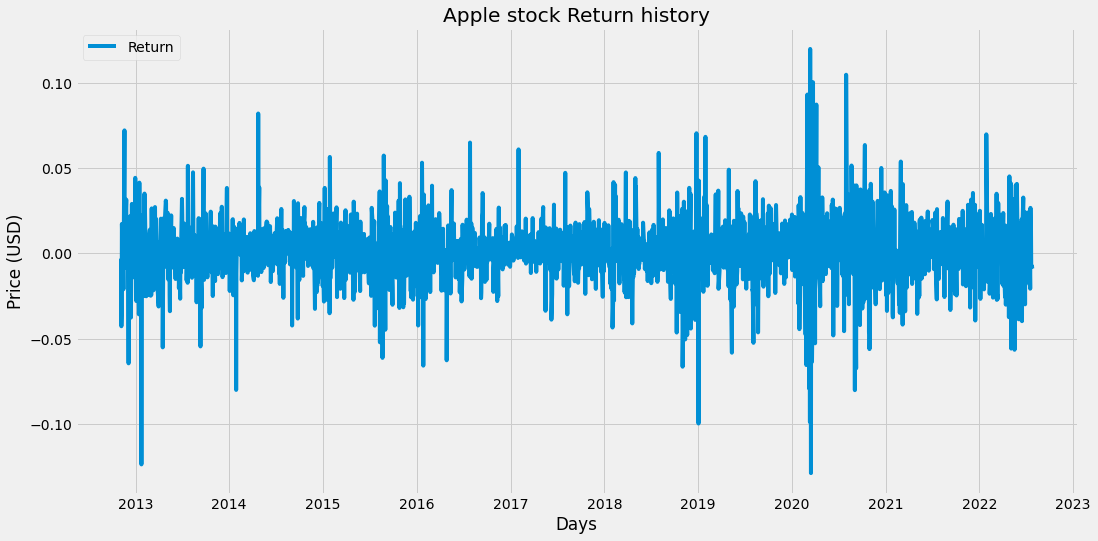

In [8]:
plt.figure(figsize = (16,8))
plt.plot(df["AAPL_Return"])
plt.title('Apple stock Return history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Return'], loc='upper left')
plt.show()

In [9]:
df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

In [10]:
data = df.filter(['AAPL_Return'])
dataset = data.values

#Get number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

1957

In [11]:
data

,AAPL_Return
Date,
2012-11-06,-0.003028
2012-11-07,-0.042635
2012-11-08,-0.036290
2012-11-09,0.017313
2012-11-12,-0.007732
...,...
2022-07-20,0.013510
2022-07-21,0.015094
2022-07-22,-0.008111


In [12]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.50560137],
       [0.34618585],
       [0.37172329],
       ...,
       [0.48514245],
       [0.48801021],
       [0.48226236]])

## Trying to predict using 60 days as timestep 

In [13]:
train_data = scaled_data[0:training_data_len  , : ]

x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()



[array([0.50560137, 0.34618585, 0.37172329, 0.58746947, 0.486666  ,
       0.51830642, 0.47315709, 0.43337344, 0.53356164, 0.80801303,
       0.48349532, 0.52345624, 0.58800903, 0.6447665 , 0.48535774,
       0.50512318, 0.56211347, 0.48992415, 0.52404507, 0.44679129,
       0.25875879, 0.58091064, 0.41489279, 0.49189841, 0.60568069,
       0.50001914, 0.44826671, 0.36657635, 0.58915942, 0.63469446,
       0.46056895, 0.4827627 , 0.49927255, 0.52429712, 0.46230873,
       0.5339497 , 0.47504243, 0.69612989, 0.64530153, 0.46698443,
       0.40567599, 0.49411165, 0.52861937, 0.45488343, 0.56768001,
       0.49310799, 0.3742905 , 0.39080433, 0.68485491, 0.4906679 ,
       0.49632936, 0.55618446, 0.59146399, 0.02048298, 0.42290552,
       0.60882907, 0.59330431, 0.50514031, 0.50598127, 0.50126329])]
[0.4175249565166541]



In [14]:
# converting into numpy sequences to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('Number of rows and columns: ', x_train.shape)  

Number of rows and columns:  (1897, 60, 1)


In [15]:
x_train.shape

(1897, 60, 1)

In [16]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))



model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
60/60 [==============================] - 8s 54ms/step - loss: 0.0217
Epoch 2/50
60/60 [==============================] - 2s 40ms/step - loss: 0.0051
Epoch 3/50
60/60 [==============================] - 3s 44ms/step - loss: 0.0051
Epoch 4/50
60/60 [==============================] - 4s 63ms/step - loss: 0.0052
Epoch 5/50
60/60 [==============================] - 3s 46ms/step - loss: 0.0051
Epoch 6/50
60/60 [==============================] - 3s 46ms/step - loss: 0.0052
Epoch 7/50
60/60 [==============================] - 3s 49ms/step - loss: 0.0052
Epoch 8/50
60/60 [==============================] - 4s 60ms/step - loss: 0.0051
Epoch 9/50
60/60 [==============================] - 4s 67ms/step - loss: 0.0051
Epoch 10/50
60/60 [==============================] - 4s 63ms/step - loss: 0.0051
Epoch 11/50
60/60 [==============================] - 4s 62ms/step - loss: 0.0050
Epoch 12/50
60/60 [==============================] - 4s 60ms/step - loss: 0.0051
Epoch 13/50
60/60 [==================

In [17]:
# # We add the LSTM layer and later add a few Dropout layers to prevent overfitting.
# # Building a LTSM model with 50 neurons and 4 hidden layers. We add the LSTM layer with the following arguments:
# # 50 units which is the dimensionality of the output space
# # return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence input_shape as the shape of our training set.
# # When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.
# # Thereafter, we add the Dense layer that specifies the output of 1 unit.
# # After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error.

# model = Sequential()

# #Adding the first LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# # Adding the output layer
# model.add(Dense(units = 1))

# # Compiling the RNN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # Fitting the RNN to the Training set
# model.fit(x_train, y_train, epochs = 50, batch_size = 32)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Getting the predicted stock price
test_data = scaled_data[training_data_len - 60: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert x_test to a numpy array
x_test = np.array(x_test)


In [20]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print('Number of rows and columns: ', x_test.shape)

Number of rows and columns:  (489, 60, 1)


In [21]:
# Making predictions using the test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
predictions

array([[ 6.35988312e-04],
       [ 6.00402069e-04],
       [ 4.49275365e-04],
       [ 3.51876020e-04],
       [ 1.19358556e-04],
       [-1.84627541e-04],
       [ 7.19454465e-06],
       [ 3.52468371e-04],
       [ 4.35858325e-04],
       [ 6.30434894e-04],
       [ 6.11109077e-04],
       [ 2.94431578e-04],
       [ 8.00256312e-05],
       [ 4.18324373e-04],
       [ 9.55064839e-04],
       [ 5.02706564e-04],
       [ 3.82234633e-04],
       [-6.69047527e-04],
       [-9.76498937e-04],
       [-1.39192340e-03],
       [-1.97705999e-03],
       [-2.09467392e-03],
       [-1.90028967e-03],
       [-1.87321869e-03],
       [-1.81605562e-03],
       [-2.23540468e-03],
       [-2.34471052e-03],
       [-1.95860793e-03],
       [-2.04213127e-03],
       [-2.21874425e-03],
       [-2.08641030e-03],
       [-1.62852812e-03],
       [-1.37384154e-03],
       [-1.08305027e-03],
       [-5.93758130e-04],
       [-7.25707097e-04],
       [-4.33005509e-04],
       [-5.89108095e-04],
       [-5.9

In [23]:
#Get rmse
#
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.019741230663437744

In [24]:
#Mean Absolute Percentage Error - subtract from 100 and this is the accuracy? So like 97% which is pretty good
mape = np.mean(np.absolute((y_test- predictions)/y_test))* 100
mape

<ipython-input-24-c5d314939522>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.absolute((y_test- predictions)/y_test))* 100


inf

<ipython-input-25-c39c41228df6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


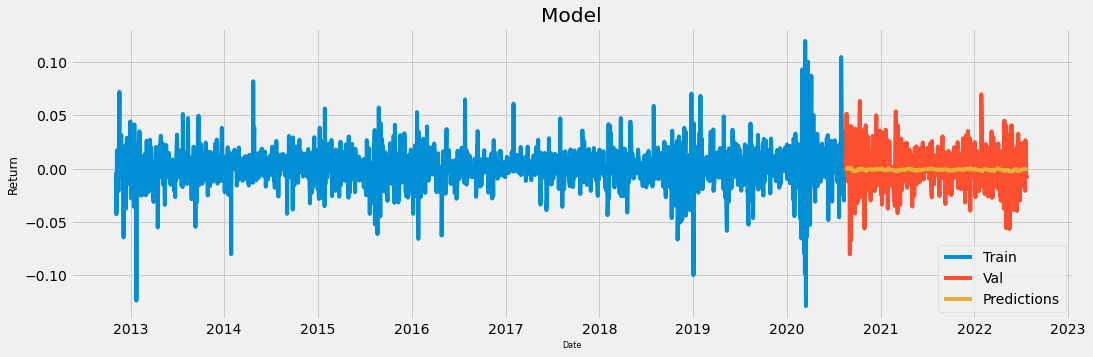

In [25]:
# Visualising the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,5))

plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Return', fontsize=12)
plt.plot(train['AAPL_Return'])
plt.plot(valid[['AAPL_Return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
valid

,AAPL_Return,Predictions
Date,,
2020-08-17,-0.002611,0.000636
2020-08-18,0.008333,0.000600
2020-08-19,0.001255,0.000449
2020-08-20,0.022190,0.000352
2020-08-21,0.051532,0.000119
...,...,...
2022-07-20,0.013510,-0.000332
2022-07-21,0.015094,-0.000357
2022-07-22,-0.008111,-0.000335


## Trying to predict using 30 days as timestep 

In [27]:
train_data = scaled_data[0:training_data_len  , : ]

x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<=30:
        print(x_train)
        print(y_train)
        print()



[array([0.50560137, 0.34618585, 0.37172329, 0.58746947, 0.486666  ,
       0.51830642, 0.47315709, 0.43337344, 0.53356164, 0.80801303,
       0.48349532, 0.52345624, 0.58800903, 0.6447665 , 0.48535774,
       0.50512318, 0.56211347, 0.48992415, 0.52404507, 0.44679129,
       0.25875879, 0.58091064, 0.41489279, 0.49189841, 0.60568069,
       0.50001914, 0.44826671, 0.36657635, 0.58915942, 0.63469446])]
[0.46056894924204117]



In [28]:
# converting into numpy sequences to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('Number of rows and columns: ', x_train.shape)  

Number of rows and columns:  (1927, 30, 1)


In [29]:
x_train.shape

(1927, 30, 1)

In [30]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
61/61 [==============================] - 9s 25ms/step - loss: 0.0219
Epoch 2/50
61/61 [==============================] - 2s 26ms/step - loss: 0.0053
Epoch 3/50
61/61 [==============================] - 2s 27ms/step - loss: 0.0053
Epoch 4/50
61/61 [==============================] - 2s 26ms/step - loss: 0.0054
Epoch 5/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0052
Epoch 6/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0053
Epoch 7/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0052
Epoch 8/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0054
Epoch 9/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0053
Epoch 10/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0052
Epoch 11/50
61/61 [==============================] - 2s 25ms/step - loss: 0.0052
Epoch 12/50
61/61 [==============================] - 2s 26ms/step - loss: 0.0052
Epoch 13/50
61/61 [==================

In [31]:
# Getting the predicted stock price
test_data = scaled_data[training_data_len - 30: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

# Convert x_test to a numpy array
x_test = np.array(x_test)


In [32]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print('Number of rows and columns: ', x_test.shape)

Number of rows and columns:  (489, 30, 1)


In [33]:
# Making predictions using the test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#Get rmse
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.019899783936973583

In [35]:
#Mean Absolute Percentage Error
mape = np.mean(np.absolute((y_test- predictions)/y_test))* 100
mape

<ipython-input-35-fada9c6543f8>:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.absolute((y_test- predictions)/y_test))* 100


inf

<ipython-input-36-2ac6b71d60cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


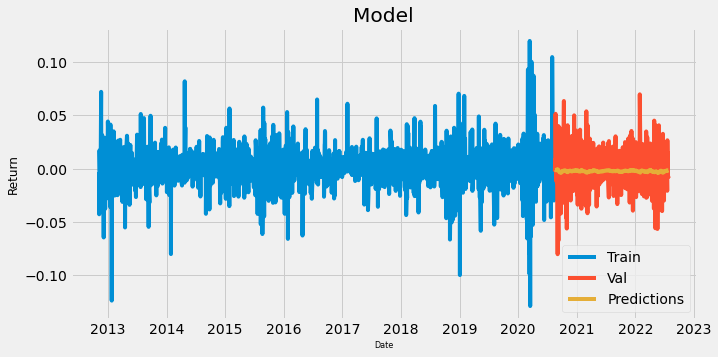

In [36]:
# Visualising the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(10,5))

plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Return', fontsize=12)
plt.plot(train['AAPL_Return'])
plt.plot(valid[['AAPL_Return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
valid

,AAPL_Return,Predictions
Date,,
2020-08-17,-0.002611,-0.000787
2020-08-18,0.008333,-0.000824
2020-08-19,0.001255,-0.000959
2020-08-20,0.022190,-0.001044
2020-08-21,0.051532,-0.001228
...,...,...
2022-07-20,0.013510,-0.001694
2022-07-21,0.015094,-0.001684
2022-07-22,-0.008111,-0.001637
